## Imports

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Transform Data

In [2]:
df = pd.read_csv('data.csv')

### This is to make predictions about predicting direction instead of magnitude simplifying the problem space

In [3]:
#Get the difference between the open of the day and the day before
pct_change = (df["open"].shift(-1) - df["open"]) / df["open"]
df["isGreater"] = pct_change > 0.001

#Replace the last row with False (since it compares to a non-existent next row)
df["isGreater"] = df["isGreater"].fillna(False)

In [4]:
#Only take relevant features and numericize everything
df = df[['1', '2', '3', 'isGreater']]
df['1'] = df['1'].astype('category').cat.codes
df['2'] = df['2'].astype('category').cat.codes
df['3'] = df['3'].astype('category').cat.codes
df['isGreater'] = df['isGreater'].astype('category').cat.codes

## Analysis And Visualization

### Calculate Collinearity

In [5]:
def calculate_vif(data_frame, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data_frame[features].values, i) for i in range(len(features))]
    return vif_data

vif_result = calculate_vif(df, ['1', '2', '3'])
vif_result

,Feature,VIF
0,1,0.056864
1,2,0.079522
2,3,1.006320


### Plot Features

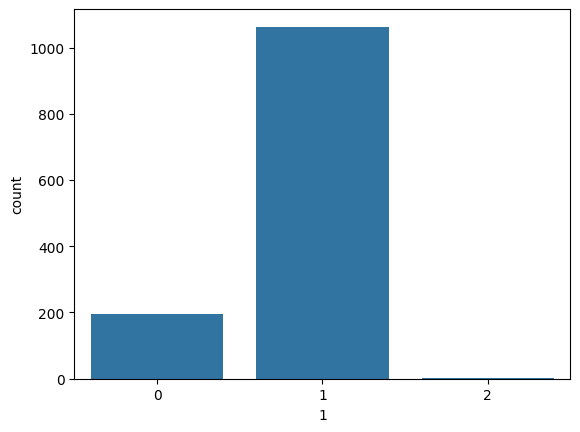

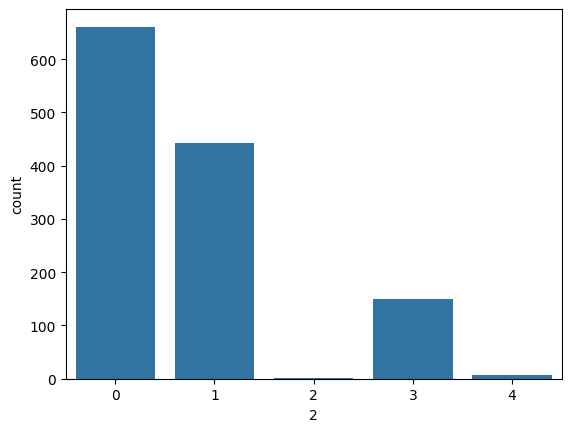

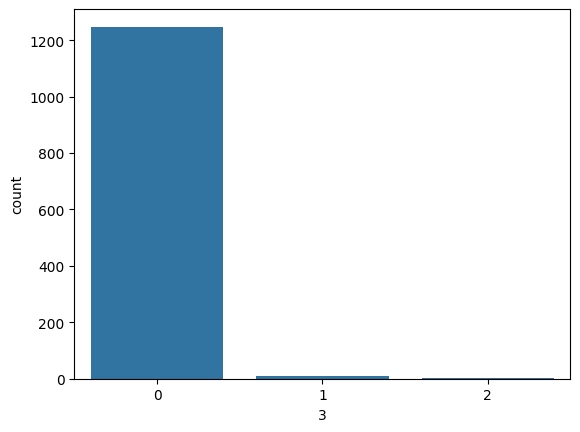

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.countplot(data=df, x='1')
plt.show()
sns.countplot(data=df, x='2')
plt.show()
sns.countplot(data=df, x='3')
plt.show()

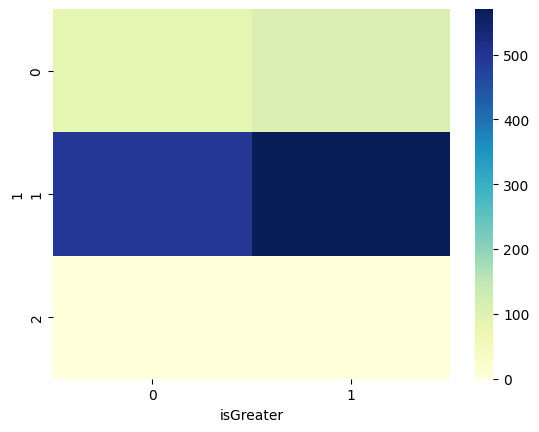

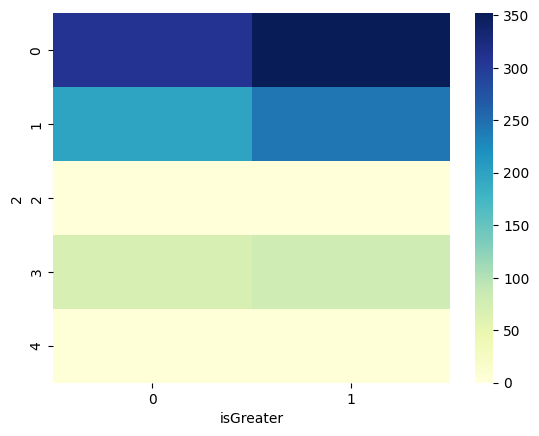

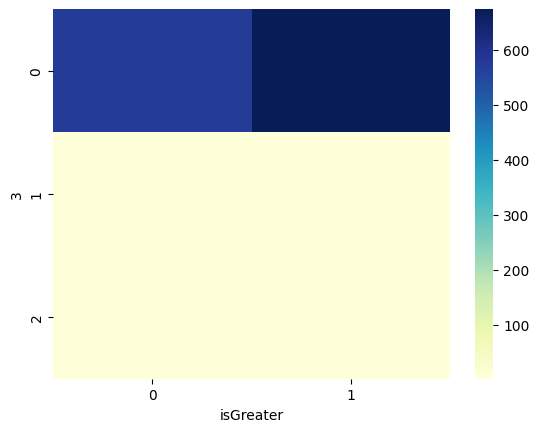

In [7]:
ct = pd.crosstab(df['1'], df['isGreater'])
sns.heatmap(ct, cmap='YlGnBu')
plt.show()
ct = pd.crosstab(df['2'], df['isGreater'])
sns.heatmap(ct, cmap='YlGnBu')
plt.show()
ct = pd.crosstab(df['3'], df['isGreater'])
sns.heatmap(ct, cmap='YlGnBu')
plt.show()

## Run Models

### Logisitic Regression

In [8]:
# Features and target
X = df[['1', '2', '3']]
y = df['isGreater']

# Split into train and test sets (optional but common)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Coefficients
print("Intercept:", clf.intercept_)
print("Coefficients:", clf.coef_)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.55      0.99      0.71       139

    accuracy                           0.55       252
   macro avg       0.27      0.50      0.35       252
weighted avg       0.30      0.55      0.39       252

Intercept: [0.00423382]
Coefficients: [[ 0.12378825  0.05431874 -0.08807175]]


### Random Forest

In [9]:
X = df[['1', '2', '3']]
y = df['isGreater']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5357142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.02       116
           1       0.54      0.99      0.70       136

    accuracy                           0.54       252
   macro avg       0.44      0.50      0.36       252
weighted avg       0.44      0.54      0.38       252

